In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Day11.csv')
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
x = df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

c:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kme

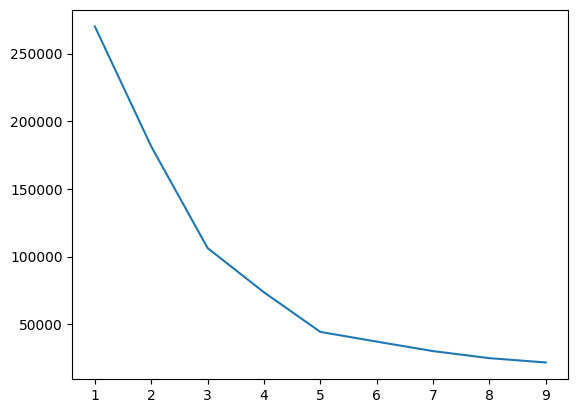

In [7]:
from sklearn.cluster import KMeans
wcss = []                                    # wcss = within cluster sum of square
for i in range(1,10):
    km = KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,10),wcss)

In [8]:
# 5 is the optimum value here for k

In [9]:
# model building
kms = KMeans(n_clusters=5,init='k-means++',random_state=0)

In [10]:
# prediction
y_pred = kms.fit_predict(x)

c:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


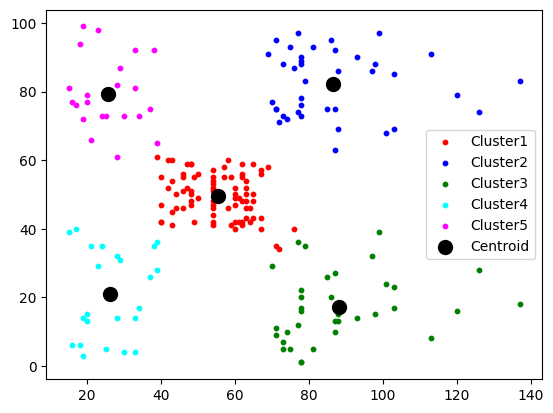

In [11]:
# visualize the cluster
plt.scatter(x[y_pred==0,0],x[y_pred == 0,1],s=10,c='red',label='Cluster1')
plt.scatter(x[y_pred==1,0],x[y_pred == 1,1],s=10,c='blue',label='Cluster2')
plt.scatter(x[y_pred==2,0],x[y_pred == 2,1],s=10,c='green',label='Cluster3')
plt.scatter(x[y_pred==3,0],x[y_pred == 3,1],s=10,c='cyan',label='Cluster4')
plt.scatter(x[y_pred==4,0],x[y_pred == 4,1],s=10,c='magenta',label='Cluster5')
plt.scatter(kms.cluster_centers_[:,0],kms.cluster_centers_[:,1],s=100,c='k',label='Centroid')
plt.legend()

# k-means clustering

Text(0.5, 1.0, 'Dendrogram')

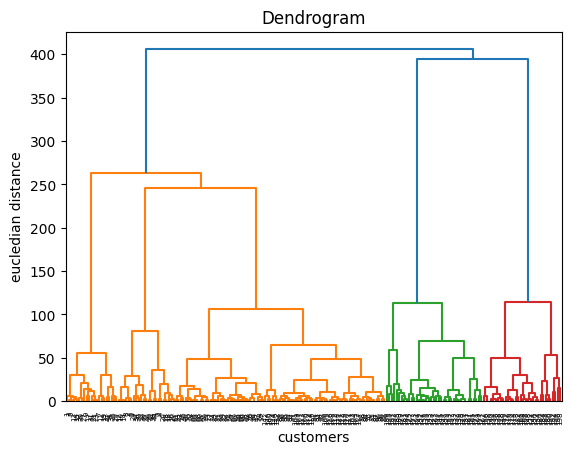

In [12]:
# model building for hierarchical clustering

import scipy.cluster.hierarchy as sch

# using dendograms to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))

plt.xlabel('customers')
plt.ylabel('eucledian distance')
plt.title('Dendrogram')

In [13]:
# training the model for hierarchical clustering

from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_pred_agg= agg.fit_predict(x)

c:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [14]:
y_pred_agg

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

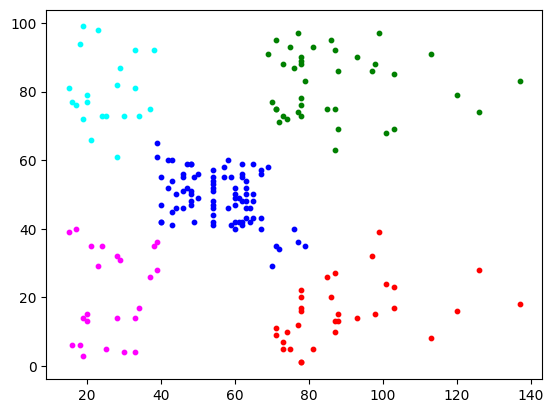

In [15]:
# visualize the cluster
plt.scatter(x[y_pred_agg==0,0],x[y_pred_agg == 0,1],s=10,c='red',label='Cluster1')
plt.scatter(x[y_pred_agg==1,0],x[y_pred_agg == 1,1],s=10,c='blue',label='Cluster2')
plt.scatter(x[y_pred_agg==2,0],x[y_pred_agg == 2,1],s=10,c='green',label='Cluster3')
plt.scatter(x[y_pred_agg==3,0],x[y_pred_agg == 3,1],s=10,c='cyan',label='Cluster4')
plt.scatter(x[y_pred_agg==4,0],x[y_pred_agg == 4,1],s=10,c='magenta',label='Cluster5')

In [16]:
df = pd.read_csv('College.csv')
df.head(5)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [17]:
df.shape

(777, 18)

In [18]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


C:\Users\sai\AppData\Local\Temp\ipykernel_18384\2900022993.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Accept'])


<Axes: ylabel='Density'>

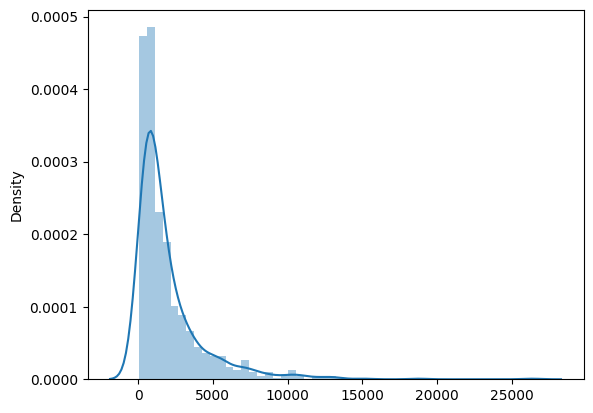

In [19]:
sns.distplot(x=df['Accept'])

<Axes: xlabel='Private', ylabel='count'>

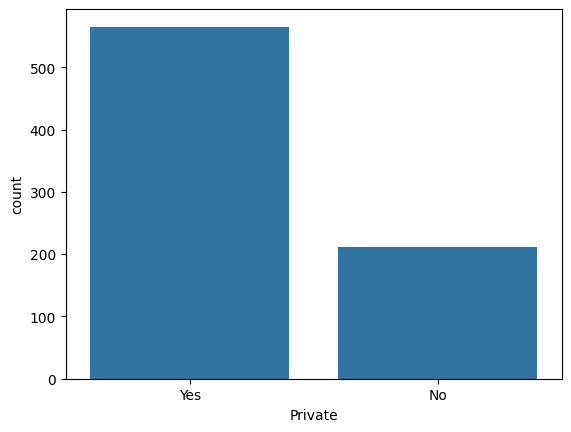

In [20]:
sns.countplot(x=df['Private'])

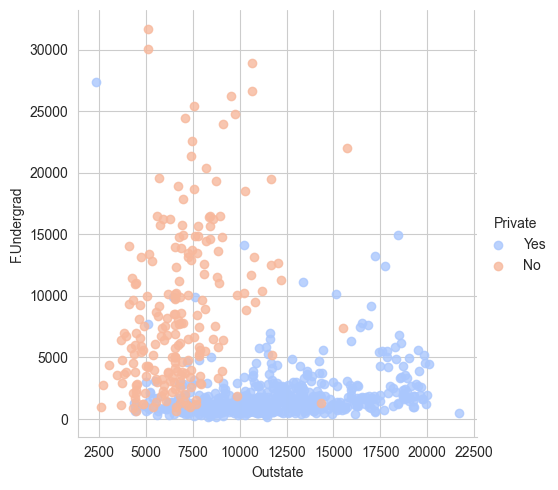

In [21]:
sns.set_style('whitegrid')
sns.lmplot(data=df, x='Outstate',y='F.Undergrad',hue='Private',
           palette='coolwarm',aspect=1,fit_reg=False)

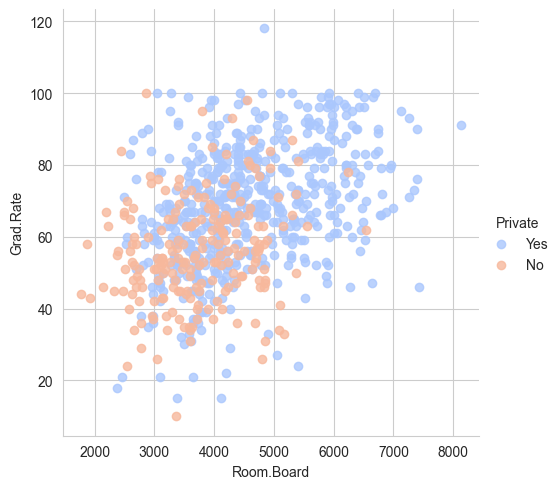

In [22]:
sns.set_style('whitegrid')
sns.lmplot(data=df, x='Room.Board',y='Grad.Rate',hue='Private',
          palette='coolwarm',aspect=1,fit_reg=False)

In [23]:
# apply KMeans algo
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df.drop('Private',axis=1))



c:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [24]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [25]:
df['Cluster'] = df['Private'].apply(converter)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(df['Cluster'],kmeans.labels_)
cm

array([[ 74, 138],
       [ 34, 531]], dtype=int64)

In [27]:
print(classification_report(df['Cluster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [28]:
df.head(5)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [29]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]

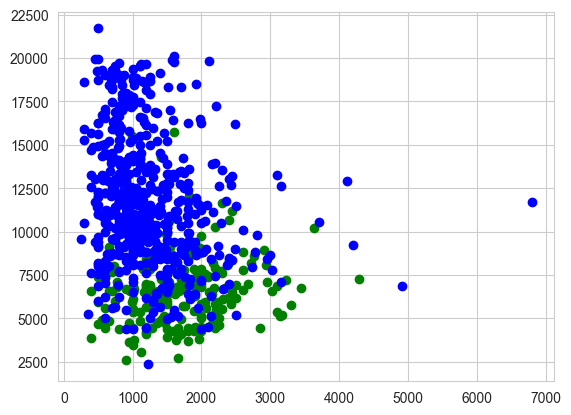

In [30]:
# Visualize the clustered data
#Predicted output in dataset

plt.scatter(df1['Personal'], df1['Outstate'], color='green')
plt.scatter(df2['Personal'], df2['Outstate'], color='blue')
# The below data will be the predicted output by the model

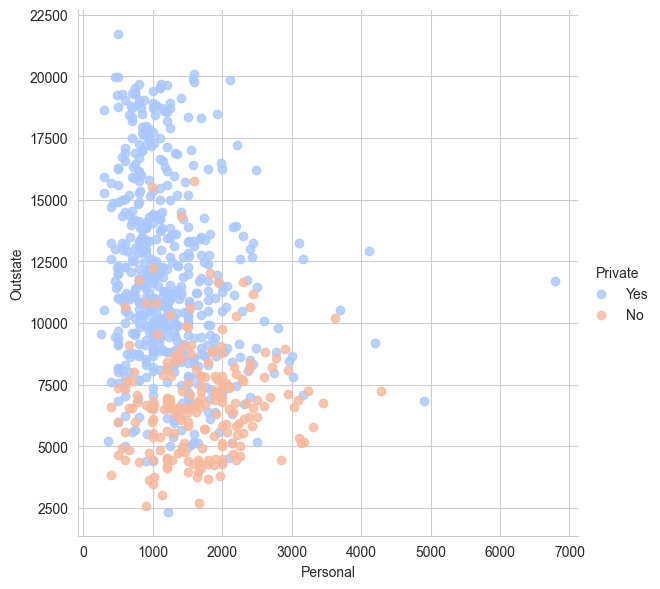

In [31]:
#Actual output in dataset
sns.set_style('whitegrid')
sns.lmplot(x='Personal',y='Outstate',data=df, hue='Private',
           palette='coolwarm',height=6,fit_reg=False)

# DB-SCAN algo

In [32]:
df = pd.read_csv('Day11.csv')
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
x = df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [35]:
# apply DBSCAN algo

In [39]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.3,min_samples=4,metric='euclidean')
model=db.fit(x)

In [40]:
label=model.labels_

In [41]:
y_pred=db.fit_predict(x)
y_pred

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1,  0,  2, -1,  2,  0,  1,  0, -1,  0,
       -1,  0, -1,  0, -1,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  6,  4,  6,  4,  6,  4,
        6,  4,  6,  4,  6,  4,  6,  4,  6,  4, -1,  4,  6,  4, -1, -1,  7,
       -1,  7,  4,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

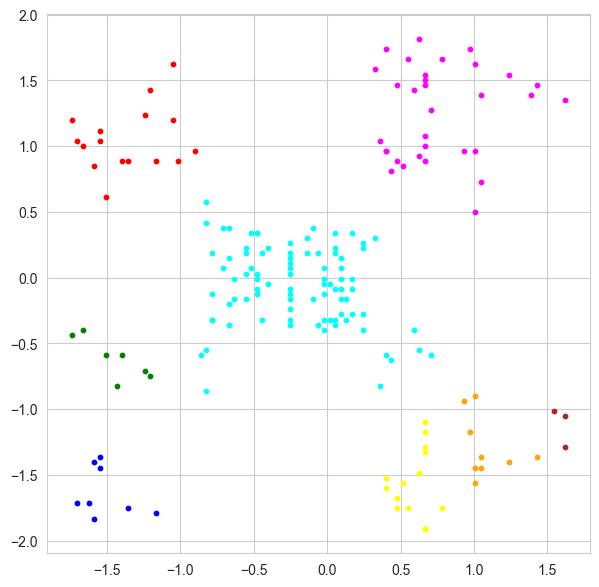

In [44]:
# visualize the cluster
plt.figure(figsize=(7,7))
plt.scatter(x[y_pred==0,0],x[y_pred == 0,1],s=10,c='red',label='Cluster1')
plt.scatter(x[y_pred==1,0],x[y_pred == 1,1],s=10,c='blue',label='Cluster2')
plt.scatter(x[y_pred==2,0],x[y_pred == 2,1],s=10,c='green',label='Cluster3')
plt.scatter(x[y_pred==3,0],x[y_pred == 3,1],s=10,c='cyan',label='Cluster4')
plt.scatter(x[y_pred==4,0],x[y_pred == 4,1],s=10,c='magenta',label='Cluster5')
plt.scatter(x[y_pred==5,0],x[y_pred == 5,1],s=10,c='yellow',label='Cluster6')
plt.scatter(x[y_pred==6,0],x[y_pred == 6,1],s=10,c='orange',label='Cluster7')
plt.scatter(x[y_pred==7,0],x[y_pred == 7,1],s=10,c='brown',label='Cluster8')



In [45]:
df=pd.read_csv('student_clustering.csv')
df.head(5)

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [46]:
df.describe()

,cgpa,iq
count,200.000000,200.000000
mean,6.983400,101.995000
std,1.624101,12.161599
min,4.600000,83.000000
25%,5.407500,91.000000
50%,7.040000,102.000000
75%,8.585000,113.000000
max,9.300000,121.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    200 non-null    float64
 1   iq      200 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


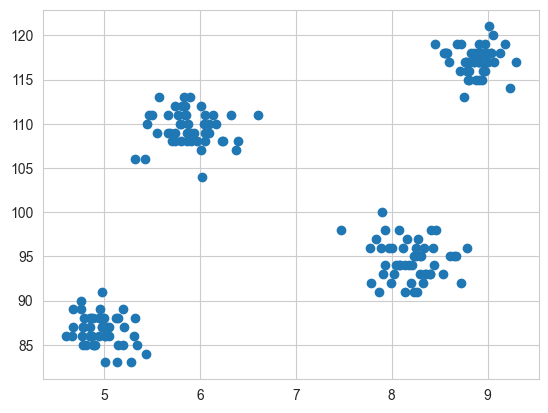

In [52]:
plt.scatter(x=df.cgpa,y=df.iq)

In [92]:
db=DBSCAN(eps=1,min_samples=4,metric='euclidean')
model=db.fit(df)

In [93]:
sc=StandardScaler()
df=sc.fit_transform(df)

In [94]:
label=model.labels_
label

array([0, 1, 2, 2, 1, 1, 2, 3, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       2, 0, 0, 2, 0, 3, 2, 1, 3, 1, 3, 1, 2, 2, 3, 1, 0, 1, 0, 2, 2, 0,
       3, 3, 2, 1, 3, 1, 0, 0, 3, 2, 3, 1, 1, 3, 1, 3, 1, 2, 2, 3, 0, 3,
       2, 0, 1, 2, 1, 3, 2, 0, 1, 3, 1, 3, 0, 2, 2, 3, 1, 0, 3, 0, 3, 1,
       3, 1, 3, 3, 2, 0, 2, 2, 3, 2, 0, 3, 1, 0, 0, 3, 0, 0, 2, 0, 3, 3,
       2, 3, 1, 1, 2, 3, 2, 1, 3, 0, 0, 1, 2, 3, 2, 0, 2, 1, 0, 2, 2, 1,
       0, 0, 1, 3, 1, 0, 2, 2, 2, 0, 1, 0, 0, 3, 0, 3, 1, 0, 3, 0, 3, 3,
       0, 2, 1, 3, 1, 2, 0, 3, 1, 2, 3, 0, 1, 0, 0, 3, 3, 1, 3, 0, 0, 2,
       3, 1, 0, 3, 3, 1, 1, 1, 2, 0, 2, 2, 3, 1, 2, 2, 0, 0, 2, 0, 3, 1,
       1, 3], dtype=int64)

In [95]:
y_perd=db.fit_predict(df)
y_perd

array([0, 1, 2, 2, 1, 1, 2, 3, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       2, 0, 0, 2, 0, 3, 2, 1, 3, 1, 3, 1, 2, 2, 3, 1, 0, 1, 0, 2, 2, 0,
       3, 3, 2, 1, 3, 1, 0, 0, 3, 2, 3, 1, 1, 3, 1, 3, 1, 2, 2, 3, 0, 3,
       2, 0, 1, 2, 1, 3, 2, 0, 1, 3, 1, 3, 0, 2, 2, 3, 1, 0, 3, 0, 3, 1,
       3, 1, 3, 3, 2, 0, 2, 2, 3, 2, 0, 3, 1, 0, 0, 3, 0, 0, 2, 0, 3, 3,
       2, 3, 1, 1, 2, 3, 2, 1, 3, 0, 0, 1, 2, 3, 2, 0, 2, 1, 0, 2, 2, 1,
       0, 0, 1, 3, 1, 0, 2, 2, 2, 0, 1, 0, 0, 3, 0, 3, 1, 0, 3, 0, 3, 3,
       0, 2, 1, 3, 1, 2, 0, 3, 1, 2, 3, 0, 1, 0, 0, 3, 3, 1, 3, 0, 0, 2,
       3, 1, 0, 3, 3, 1, 1, 1, 2, 0, 2, 2, 3, 1, 2, 2, 0, 0, 2, 0, 3, 1,
       1, 3], dtype=int64)

In [96]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=4,init='k-means++',random_state=0)
kms.fit(df)

c:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [97]:
y_pred=kms.fit_predict(df)
y_pred

c:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 3, 2, 2, 3, 3, 2, 0, 3, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 3, 2, 1,
       2, 1, 1, 2, 1, 0, 2, 3, 0, 3, 0, 3, 2, 2, 0, 3, 1, 3, 1, 2, 2, 1,
       0, 0, 2, 3, 0, 3, 1, 1, 0, 2, 0, 3, 3, 0, 3, 0, 3, 2, 2, 0, 1, 0,
       2, 1, 3, 2, 3, 0, 2, 1, 3, 0, 3, 0, 1, 2, 2, 0, 3, 1, 0, 1, 0, 3,
       0, 3, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 3, 1, 1, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 3, 3, 2, 0, 2, 3, 0, 1, 1, 3, 2, 0, 2, 1, 2, 3, 1, 2, 2, 3,
       1, 1, 3, 0, 3, 1, 2, 2, 2, 1, 3, 1, 1, 0, 1, 0, 3, 1, 0, 1, 0, 0,
       1, 2, 3, 0, 3, 2, 1, 0, 3, 2, 0, 1, 3, 1, 1, 0, 0, 3, 0, 1, 1, 2,
       0, 3, 1, 0, 0, 3, 3, 3, 2, 1, 2, 2, 0, 3, 2, 2, 1, 1, 2, 1, 0, 3,
       3, 0])

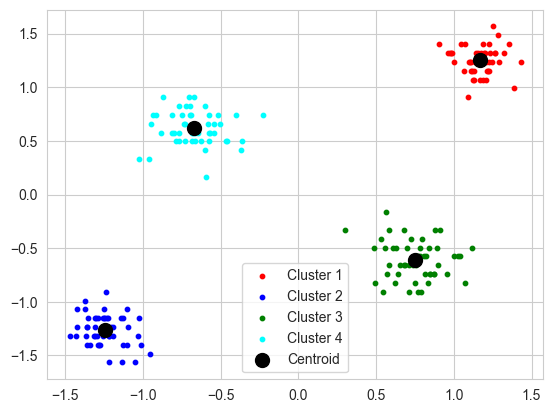

In [98]:
plt.scatter(df[y_pred == 0,0],df[y_pred == 0,1],s=10,c='red',label='Cluster 1')
plt.scatter(df[y_pred == 1,0],df[y_pred == 1,1],s=10,c='blue',label='Cluster 2')
plt.scatter(df[y_pred == 2,0],df[y_pred == 2,1],s=10,c='green',label='Cluster 3')
plt.scatter(df[y_pred == 3,0],df[y_pred == 3,1],s=10,c='cyan',label='Cluster 4')


plt.scatter(kms.cluster_centers_[:,0],kms.cluster_centers_[:,1],s=100,c='k',label='Centroid' )
plt.legend()

In [99]:
from sklearn.metrics import silhouette_score
sc=silhouette_score(df,label)
sc

0.8605024348950161

In [ ]:
# more the value of silhouette score more will be the accuracy of the model.